# Import all libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [10]:
# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score

## Take all the titles.csv from each titles 

In [3]:
amazon_titles = pd.read_csv("./amazon_prime/titles.csv")
appletv_titles = pd.read_csv("./apple/titles.csv")
disney_titles = pd.read_csv("./disney/titles.csv")
hbo_titles = pd.read_csv("./HBO/titles.csv")
netflix_titles = pd.read_csv("./netflix/titles.csv")
paramount_titles = pd.read_csv("./paramount/titles.csv")

In [40]:
amazon_credits = pd.read_csv("./amazon_prime/credits.csv")
appletv_credits = pd.read_csv("./apple/credits.csv")
disney_credits = pd.read_csv("./disney/credits.csv")
hbo_credits = pd.read_csv("./HBO/credits.csv")
netflix_credits = pd.read_csv("./netflix/credits.csv")
paramount_credits = pd.read_csv("./paramount/credits.csv")

In [4]:
amazon_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,tm1292884,Hunt,MOVIE,"Arjun is the ACP of Hyderabad, who gets involv...",2023,NaN,129,"['action', 'thriller', 'crime']",['IN'],NaN,tt21946058,5.8,1269.0,4.403,4.300
10869,tm1284753,Ennalum Ente Aliya,MOVIE,It tells the story of a teen girl from a Musli...,2023,NaN,113,"['drama', 'comedy']",['IN'],NaN,tt23805304,5.6,812.0,3.406,8.000
10870,tm1303380,Anubhav Singh Bassi: Bas Kar Bassi,MOVIE,"Fresh out of national law university, Bassi ar...",2023,NaN,83,['comedy'],[],NaN,tt26548127,8.3,10.0,1.960,NaN
10871,tm1307408,Pinkfong! Summer in Wonderville,MOVIE,It’s a hot summer day in Wonderville! Let’s jo...,2023,NaN,47,[],[],NaN,NaN,NaN,NaN,1.336,NaN


In [5]:
appletv_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm1300,A Charlie Brown Christmas,MOVIE,When Charlie Brown complains about the overwhe...,1965,G,25,"['comedy', 'drama', 'family', 'music', 'animat...",['US'],NaN,tt0059026,8.3,40328.0,10.848,7.688
1,tm71152,"It's the Great Pumpkin, Charlie Brown",MOVIE,"This classic ""Peanuts"" tale focuses on the thu...",1966,G,25,"['animation', 'comedy', 'family']",['US'],NaN,tt0060550,8.2,20299.0,12.458,7.474
2,tm2562,A Charlie Brown Thanksgiving,MOVIE,"Turkey, cranberries, pumpkin pie... and the Pe...",1973,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0068359,7.7,11406.0,12.591,7.311
3,tm125274,"Be My Valentine, Charlie Brown",MOVIE,It's Valentine's Day again and Charlie Brown d...,1975,G,25,"['animation', 'family', 'romance', 'comedy']",['US'],NaN,tt0072687,7.4,2777.0,6.981,7.000
4,tm106607,"It's the Easter Beagle, Charlie Brown",MOVIE,"Charlie Brown, Linus and the entire Peanuts ga...",1974,G,25,"['family', 'animation', 'comedy']",['US'],NaN,tt0071679,7.5,3001.0,6.172,6.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ts328281,Dear Edward,SHOW,A 12-year-old boy survives a plane crash that ...,2023,TV-MA,0,['drama'],['US'],1.0,tt17543896,7.4,1324.0,37.810,2.000
166,ts316895,The Reluctant Traveler with Eugene Levy,SHOW,Award-winning actor and nervous explorer Eugen...,2023,TV-PG,35,"['documentation', 'reality']",['GB'],1.0,tt15822846,7.8,473.0,13.892,6.800
167,ts296808,Liaison,SHOW,This contemporary thriller explores how past m...,2023,TV-MA,51,"['crime', 'thriller']","['FR', 'GB']",1.0,tt14792896,6.3,549.0,84.911,6.100
168,ts374301,Super League: The War For Football,SHOW,"The past, present, and future of European foot...",2023,TV-MA,0,"['documentation', 'sport']",['US'],1.0,tt24587530,7.4,414.0,6.800,6.700


In [6]:
disney_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm89464,Miracle on 34th Street,MOVIE,"Kris Kringle, seemingly the embodiment of Sant...",1947,G,96,"['family', 'comedy', 'drama']",['US'],NaN,tt0039628,7.9,50969.0,23.515,7.388
1,tm61729,The Adventures of Ichabod and Mr. Toad,MOVIE,The Wind in the Willows: Concise version of Ke...,1950,G,68,"['horror', 'fantasy', 'animation', 'family', '...",['US'],NaN,tt0041094,6.9,16502.0,16.194,6.500
2,tm61052,Cinderella,MOVIE,Cinderella has faith her dreams of a better li...,1950,G,74,"['fantasy', 'animation', 'family', 'romance']",['US'],NaN,tt0042332,7.3,164292.0,93.547,7.035
3,tm87946,Dumbo,MOVIE,Dumbo is a baby elephant born with over-sized ...,1941,G,64,"['animation', 'drama', 'family', 'fantasy']",['US'],NaN,tt0033563,7.2,135045.0,54.265,6.999
4,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1941,G,119,"['animation', 'family', 'fantasy', 'music']",['US'],NaN,tt0032455,7.7,98764.0,43.609,7.382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,ts305794,7 Toughest Days,SHOW,Dwayne Fields grew up around violent gangs and...,2023,TV-PG,49,"['reality', 'documentation', 'action']",['US'],1.0,tt15257974,7.8,23.0,3.733,2.000
1850,tm1308301,Disney100 | Special Look,MOVIE,"In 2023, Disney’s 100-year milestone provides ...",2023,NaN,1,[],[],NaN,NaN,NaN,NaN,1.960,NaN
1851,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN
1852,tm1227149,Baby Sharks,MOVIE,"Even the biggest, fastest and fiercest predato...",2023,PG,45,['documentation'],['US'],NaN,tt21271008,6.3,19.0,1.501,2.000


In [7]:
hbo_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1943,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,577842.0,22.005,8.167
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,406105.0,56.631,7.583
2,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,446627.0,19.900,8.022
3,tm3175,Meet Me in St. Louis,MOVIE,In the year before the 1904 St. Louis World's ...,1945,NaN,113,"['drama', 'family', 'romance', 'music', 'comedy']",['US'],NaN,tt0037059,7.5,25589.0,8.311,7.000
4,ts225761,Tom and Jerry,SHOW,Tom and Jerry is an American animated franchis...,1940,NaN,8,"['animation', 'comedy', 'family', 'action']",['US'],16.0,tt6422744,7.7,859.0,1.400,10.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,tm1305288,"Marcella Arguello: Bitch, Grow Up!",MOVIE,Arguello couples her larger-than-life stage pr...,2023,R,37,['comedy'],['US'],NaN,tt26623699,6.9,27.0,7.509,2.000
3026,tm1303655,Super-Vilains: l'Enquête,MOVIE,Comic book writers discuss how they make the v...,2023,PG-13,62,['documentation'],['FR'],NaN,tt26498712,5.5,45.0,3.402,6.000
3027,tm1296261,Just a Boy From Tupelo: Bringing Elvis to the ...,MOVIE,"Director Baz Luhrmann, actors Austin Butler an...",2023,PG-13,27,['documentation'],[],NaN,NaN,NaN,NaN,2.605,4.500
3028,tm1065897,Dionne Warwick: Don't Make Me Over,MOVIE,The story of the iconic singer's fascinating s...,2023,PG,95,"['documentation', 'music']","['US', 'GB']",NaN,tt6170406,7.8,255.0,9.371,NaN


In [8]:
netflix_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW'],NaN,NaN,NaN,NaN,3.351,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR'],NaN,tt26349328,7.9,209.0,2.450,7.200
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US'],NaN,tt21033382,6.1,91.0,1.960,NaN
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG'],NaN,tt14922926,5.2,18.0,1.357,4.000


In [9]:
paramount_titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm65789,Sunset Boulevard,MOVIE,A hack screenwriter writes a screenplay for a ...,1950,PG,110,['drama'],['US'],NaN,tt0043014,8.4,224704.0,18.431,8.366
1,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
2,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,79,"['comedy', 'drama', 'action', 'war', 'western'...",['US'],NaN,tt0017925,8.1,92935.0,12.316,8.009
4,tm122846,The Kid,MOVIE,A tramp cares for a boy after he's abandoned a...,1921,NaN,68,"['comedy', 'drama', 'family']",['US'],NaN,tt0012349,8.3,128096.0,14.865,8.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,ts374339,Sometimes When We Touch,SHOW,"The untold story of soft rock, whose artists d...",2023,TV-MA,48,"['documentation', 'history', 'music']",['US'],1.0,tt24512706,7.7,91.0,4.342,2.000
3178,ts361945,FBI True,SHOW,Takes viewers behind the scenes of the most co...,2023,TV-14,24,"['drama', 'documentation']",['US'],1.0,tt26895624,6.9,25.0,7.531,NaN
3179,ts378319,Lingo,SHOW,Host RuPaul Charles brings his one-of-a-kind p...,2023,NaN,42,['reality'],['US'],1.0,tt26082946,5.7,76.0,2.751,2.000
3180,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN


### every title.csv file has 
[ id,	title,	type,	description,	release_year,	age_certification,	runtime,	genres, 	production_countries,	seasons,	imdb_id,	imdb_score, 	imdb_votes, 	tmdb_popularity,	tmdb_score ]


so,we combine all into one dataset

In [11]:
titles = pd.concat([amazon_titles, appletv_titles, disney_titles, hbo_titles, netflix_titles, paramount_titles], axis = 0).reset_index()


,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25241,3177,ts374339,Sometimes When We Touch,SHOW,"The untold story of soft rock, whose artists d...",2023,TV-MA,48,"['documentation', 'history', 'music']",['US'],1.0,tt24512706,7.7,91.0,4.342,2.000
25242,3178,ts361945,FBI True,SHOW,Takes viewers behind the scenes of the most co...,2023,TV-14,24,"['drama', 'documentation']",['US'],1.0,tt26895624,6.9,25.0,7.531,NaN
25243,3179,ts378319,Lingo,SHOW,Host RuPaul Charles brings his one-of-a-kind p...,2023,NaN,42,['reality'],['US'],1.0,tt26082946,5.7,76.0,2.751,2.000
25244,3180,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN


In [41]:
credits = pd.concat([amazon_credits,appletv_credits,disney_credits,hbo_credits,netflix_credits,paramount_credits], axis = 0).reset_index()
credits

,index,person_id,id,name,character,role
0,0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...,...
370541,51190,709229,tm1285862,Jonah Feingold,NaN,DIRECTOR
370542,51191,24846,ts378319,RuPaul,Self - Host,ACTOR
370543,51192,1331687,tm1075680,Brian Cade,Narrator (voice),ACTOR
370544,51193,412947,tm1075680,Kevin Bachar,NaN,DIRECTOR


In [12]:
titles.drop(['index'], axis=1, inplace=True)


In [42]:
credits.drop(['index'], axis=1, inplace=True)

In [13]:
titles

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25241,ts374339,Sometimes When We Touch,SHOW,"The untold story of soft rock, whose artists d...",2023,TV-MA,48,"['documentation', 'history', 'music']",['US'],1.0,tt24512706,7.7,91.0,4.342,2.000
25242,ts361945,FBI True,SHOW,Takes viewers behind the scenes of the most co...,2023,TV-14,24,"['drama', 'documentation']",['US'],1.0,tt26895624,6.9,25.0,7.531,NaN
25243,ts378319,Lingo,SHOW,Host RuPaul Charles brings his one-of-a-kind p...,2023,NaN,42,['reality'],['US'],1.0,tt26082946,5.7,76.0,2.751,2.000
25244,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2023,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.623,NaN


In [43]:
credits

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...
370541,709229,tm1285862,Jonah Feingold,NaN,DIRECTOR
370542,24846,ts378319,RuPaul,Self - Host,ACTOR
370543,1331687,tm1075680,Brian Cade,Narrator (voice),ACTOR
370544,412947,tm1075680,Kevin Bachar,NaN,DIRECTOR


In [14]:
# Seeing if we have duplicates
titles[titles.duplicated() == True].head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
11321,tm57241,Never Been Kissed,MOVIE,"Josie Geller, a baby-faced junior copywriter a...",1999,PG-13,107,"['comedy', 'drama', 'romance']",['US'],NaN,tt0151738,6.0,93238.0,17.420,6.180
11387,ts22130,Rolie Polie Olie,SHOW,Rolie Polie Olie was a children's television s...,1998,TV-Y,21,"['animation', 'comedy', 'family', 'fantasy', '...","['CA', 'FR', 'US', 'GB']",6.0,tt0172049,6.3,3012.0,13.848,6.600
11586,tm98015,The Last Song,MOVIE,A drama centered on a rebellious girl who is s...,2010,PG,107,"['drama', 'romance', 'music']",['US'],NaN,tt1294226,6.0,89378.0,15.081,7.242
11613,ts22233,Shake It Up,SHOW,Best pals CeCe and Rocky dream of dancing star...,2010,TV-G,25,"['comedy', 'family']",['US'],3.0,tt0453993,8.0,88.0,41.672,7.800
11822,ts7273,Doc McStuffins,SHOW,A young African-American girl aspires to be a ...,2012,TV-G,22,"['animation', 'family', 'fantasy', 'music']",['US'],6.0,tt1710295,6.6,2551.0,35.228,5.800


In [16]:
# duplicate count
titles[titles.duplicated() == True].shape[0]

1884

In [44]:
credits[credits.duplicated() == True].shape[0]

34605

In [20]:
# Dropping duplicates
titles.drop_duplicates(inplace=True)

In [45]:
credits.drop_duplicates(inplace=True)

In [21]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],NaN,tt0038650,8.6,467766.0,27.611,8.261
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,"['comedy', 'war']",['US'],NaN,tt0023969,7.8,60933.0,9.013,7.357
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['drama', 'romance', 'comedy']",['US'],NaN,tt0032599,7.8,60244.0,14.759,7.433
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family']",['US'],26.0,tt0850645,8.5,1149.0,15.424,7.600
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,"['western', 'drama', 'romance', 'action']",['US'],NaN,tt0040724,7.8,32210.0,12.400,7.400


In [49]:
credits

,person_id,id,name,character,role
0,25020,tm87233,James Stewart,George Bailey,ACTOR
1,26190,tm87233,Donna Reed,Mary Hatch,ACTOR
2,25653,tm87233,Lionel Barrymore,Mr. Potter,ACTOR
3,13301,tm87233,Thomas Mitchell,Uncle Billy,ACTOR
4,34171,tm87233,Henry Travers,Clarence,ACTOR
...,...,...,...,...,...
370539,3750,tm1285862,Anders Holm,Adam Clark,ACTOR
370540,2769167,tm1285862,Matt Ramos,Super Society Fan Critic,ACTOR
370541,709229,tm1285862,Jonah Feingold,NaN,DIRECTOR
370542,24846,ts378319,RuPaul,Self - Host,ACTOR


## seeing how many values are there

In [22]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23362 entries, 0 to 25245
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23362 non-null  object 
 1   title                 23362 non-null  object 
 2   type                  23362 non-null  object 
 3   description           23167 non-null  object 
 4   release_year          23362 non-null  int64  
 5   age_certification     11381 non-null  object 
 6   runtime               23362 non-null  int64  
 7   genres                23362 non-null  object 
 8   production_countries  23362 non-null  object 
 9   seasons               5623 non-null   float64
 10  imdb_id               21412 non-null  object 
 11  imdb_score            20804 non-null  float64
 12  imdb_votes            20744 non-null  float64
 13  tmdb_popularity       22642 non-null  float64
 14  tmdb_score            20362 non-null  float64
dtypes: float64(5), int64(2),

In [47]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335941 entries, 0 to 370545
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  335941 non-null  int64 
 1   id         335941 non-null  object
 2   name       335941 non-null  object
 3   character  299910 non-null  object
 4   role       335941 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.4+ MB


In [23]:
titles.isnull().sum()

id                          0
title                       0
type                        0
description               195
release_year                0
age_certification       11981
runtime                     0
genres                      0
production_countries        0
seasons                 17739
imdb_id                  1950
imdb_score               2558
imdb_votes               2618
tmdb_popularity           720
tmdb_score               3000
dtype: int64

In [48]:
credits.isnull().sum()

person_id        0
id               0
name             0
character    36031
role             0
dtype: int64

Text(0.5, 1.0, 'Distribution of Missing Values')

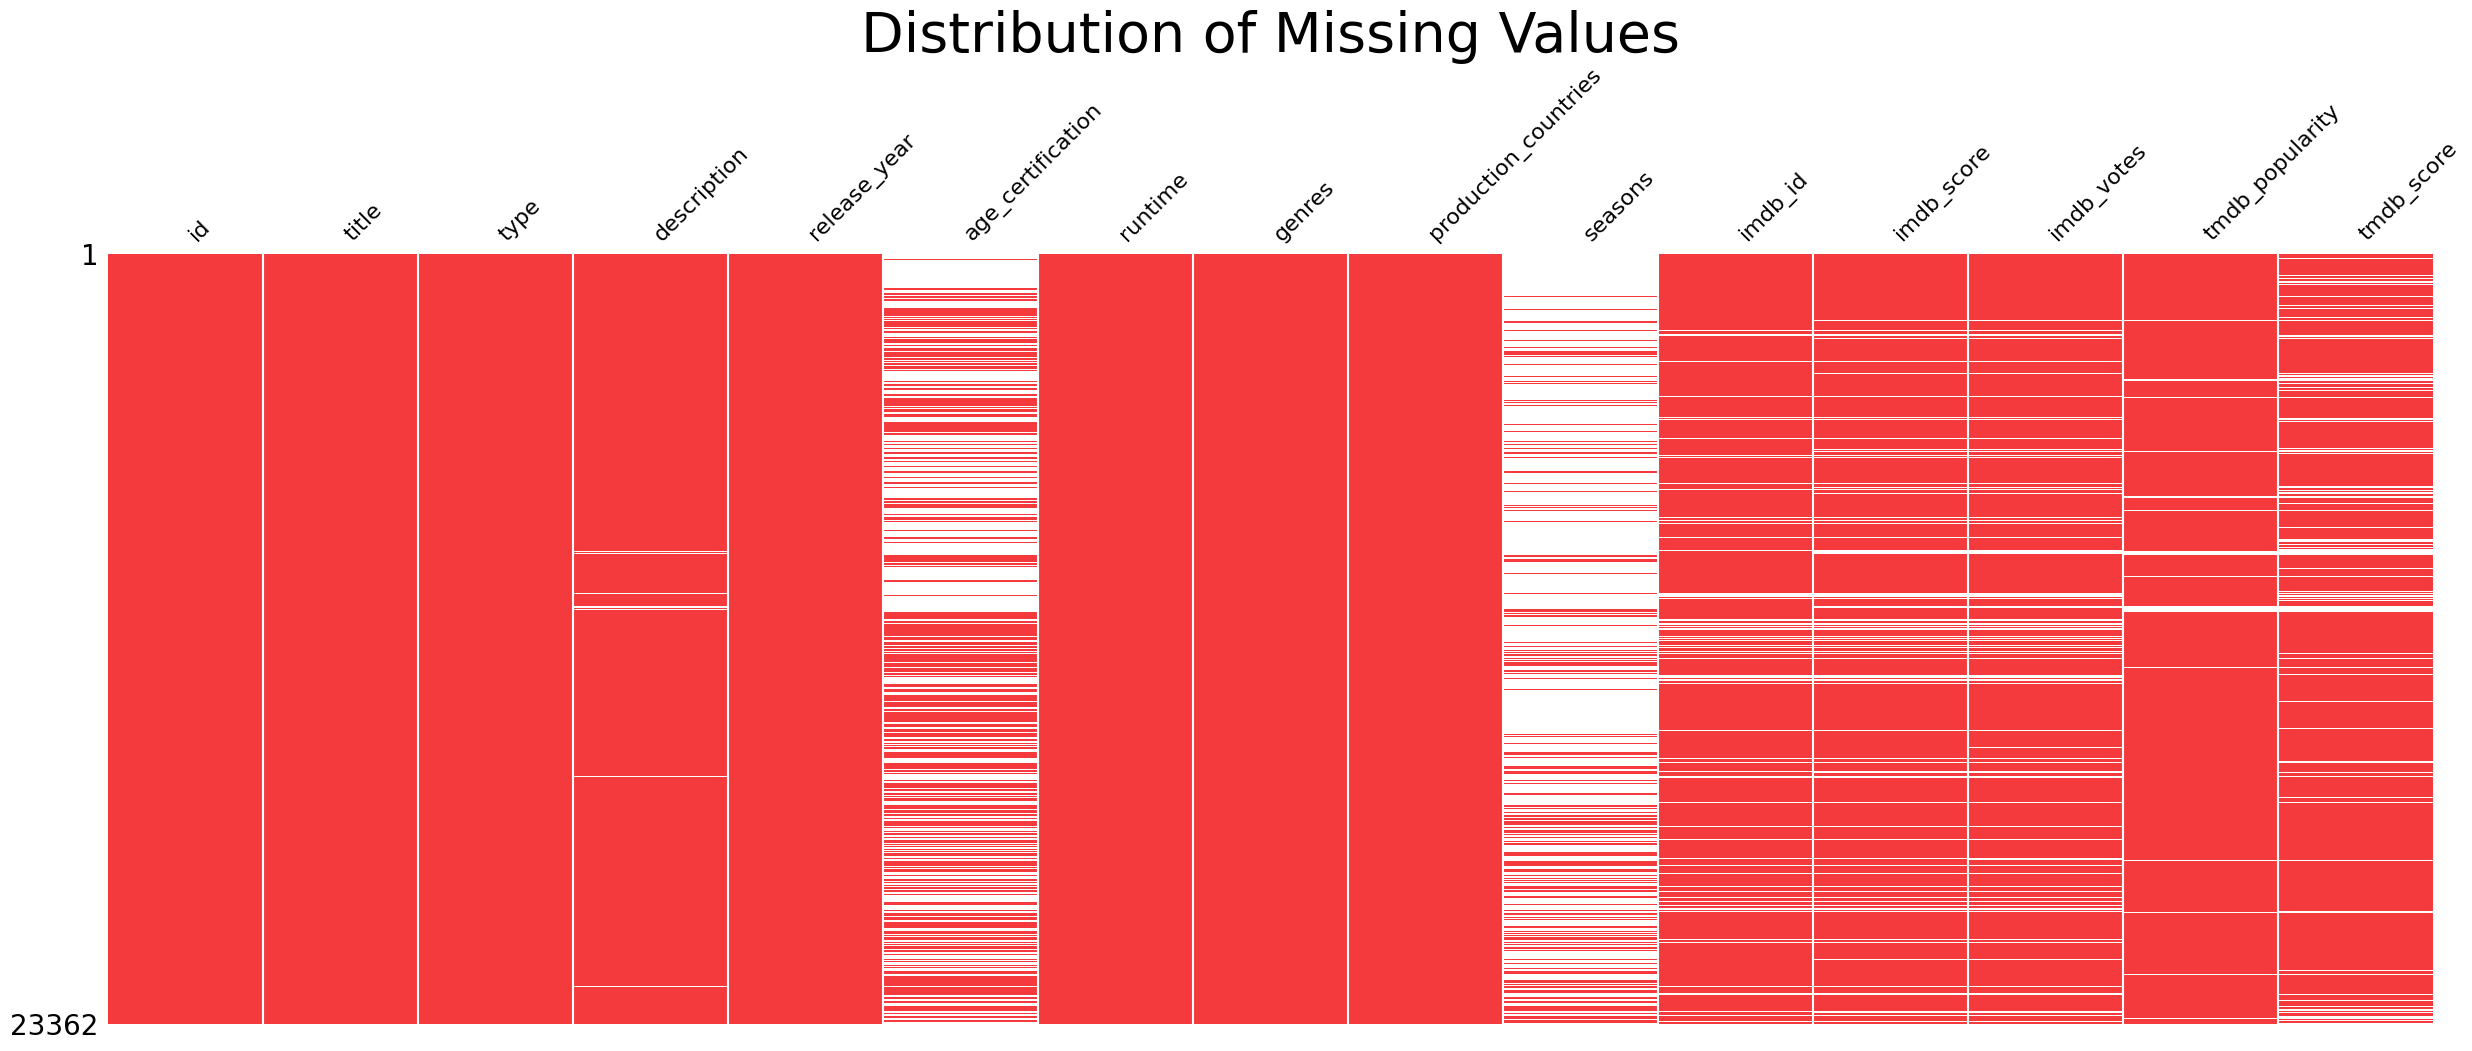

In [26]:
msno.matrix(titles, sparkline=False, figsize=(30,10), color=(0.96,0.23,0.24))
plt.title('Distribution of Missing Values', fontsize=40)

Text(0.5, 1.0, 'Distribution of Missing Values')

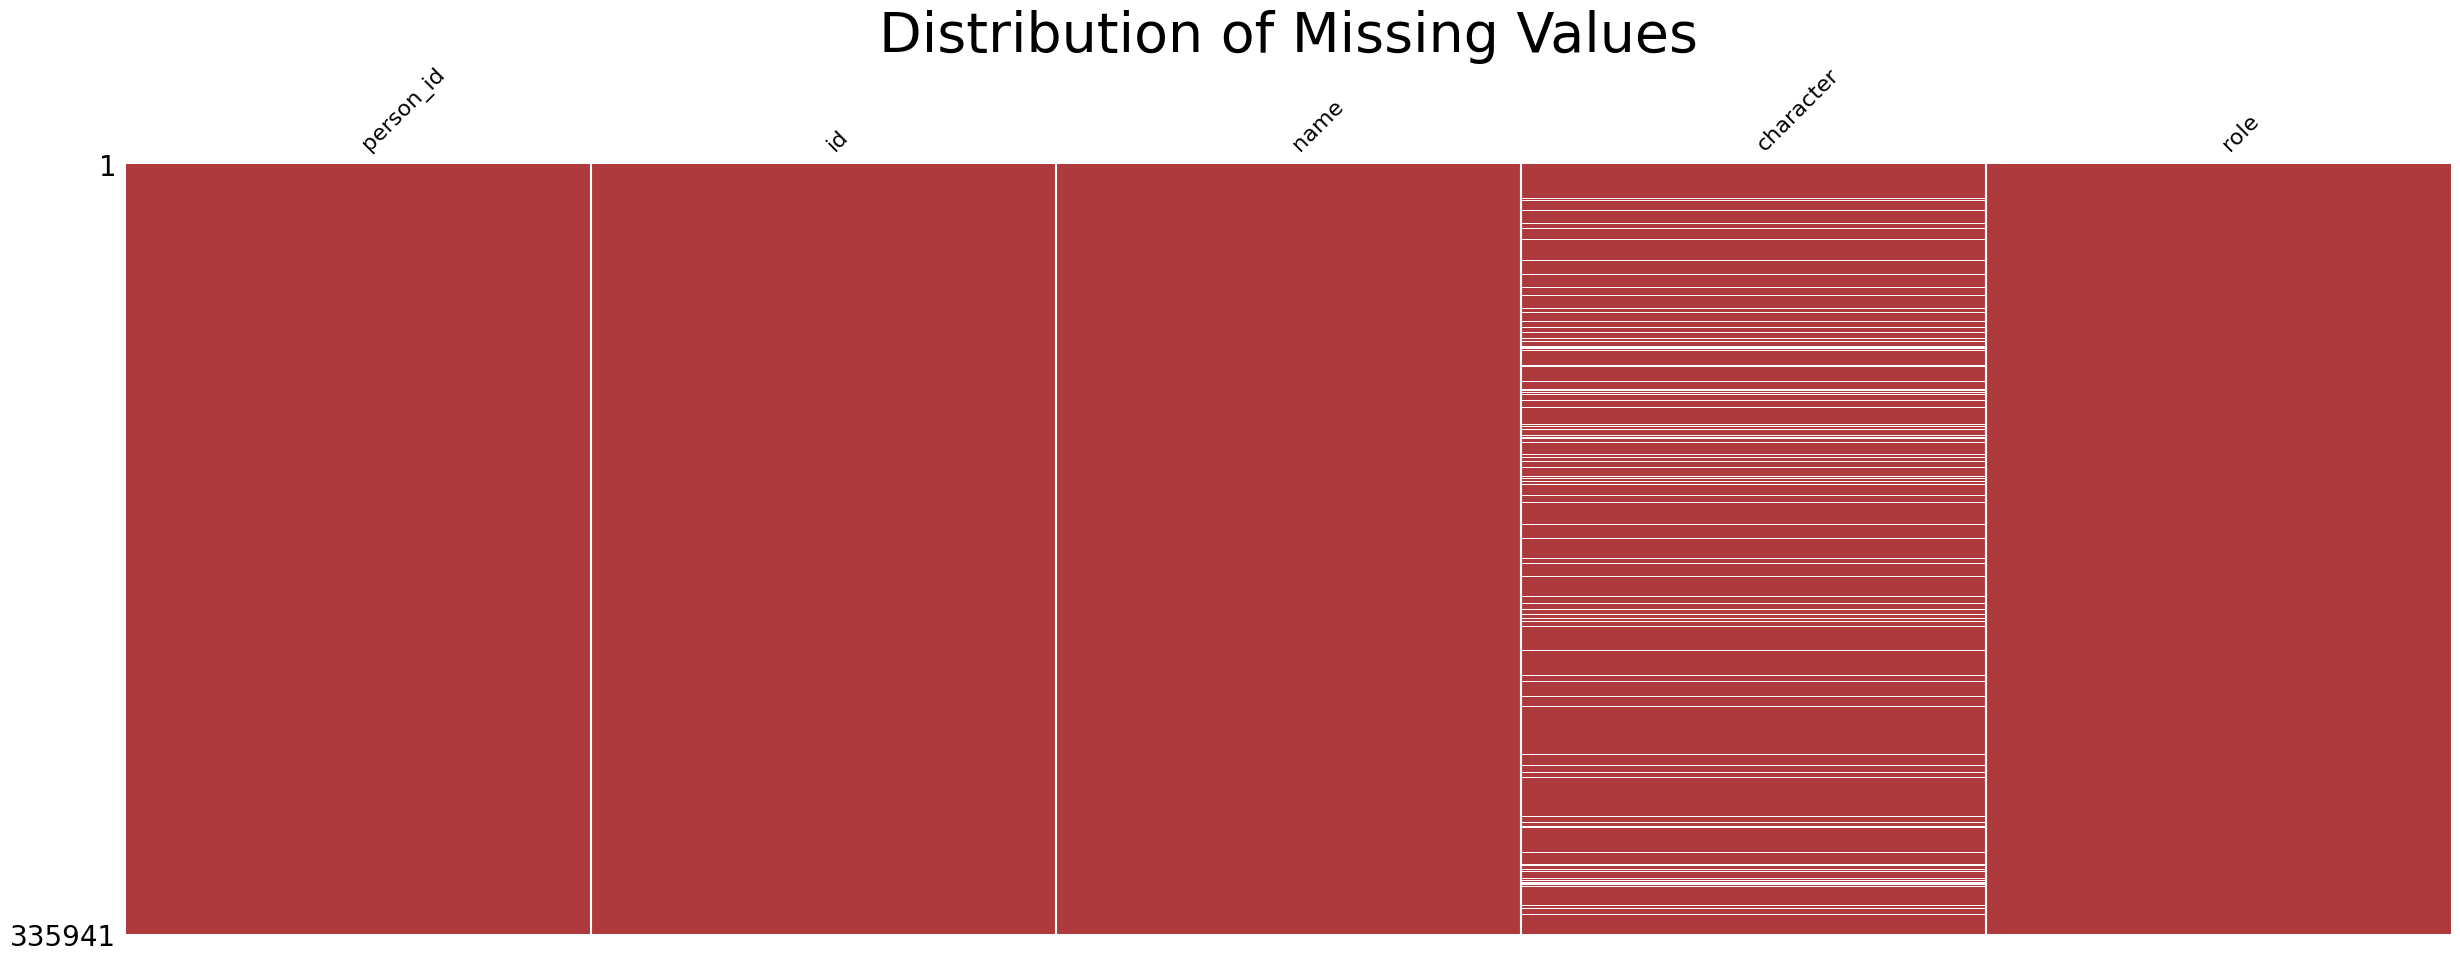

In [50]:
msno.matrix(credits, sparkline=False, figsize=(30,10), color=(0.69,0.23,0.24))
plt.title('Distribution of Missing Values', fontsize=40)

In [51]:
# drop character colloum from credits
credits.drop(['character'], axis=1, inplace=True)


In [27]:
# For genres
titles['genres'] = titles['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
titles['genre'] = titles['genres'].str.split(',').str[0]

# For countries
titles['production_countries'] = titles['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
titles['production_country'] = titles['production_countries'].str.split(',').str[0]

In [28]:
titles.drop(['genres', 'production_countries'], axis=1, inplace=True)

In [29]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,NaN,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,NaN,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,NaN,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,NaN,tt0040724,7.8,32210.0,12.400,7.400,western,US


In [52]:
credits.head()

,person_id,id,name,role
0,25020,tm87233,James Stewart,ACTOR
1,26190,tm87233,Donna Reed,ACTOR
2,25653,tm87233,Lionel Barrymore,ACTOR
3,13301,tm87233,Thomas Mitchell,ACTOR
4,34171,tm87233,Henry Travers,ACTOR


In [55]:
credits['role'].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [30]:
titles['genre'].unique()

array(['drama', 'comedy', 'western', 'romance', 'action', 'fantasy',
       'horror', 'thriller', 'documentation', 'music', 'crime', '', 'war',
       'reality', 'scifi', 'history', 'family', 'animation', 'sport',
       'european'], dtype=object)

In [31]:
titles['production_country'].unique()

array(['US', 'GB', 'SU', 'DE', 'MX', 'CA', 'IN', '', 'SE', 'IT', 'MA',
       'HK', 'FR', 'JP', 'PR', 'ES', 'IE', 'PH', 'CH', 'RO', 'YU', 'KR',
       'TW', 'MC', 'IL', 'EG', 'RU', 'AU', 'NZ', 'AT', 'ZA', 'LI', 'BR',
       'DK', 'IR', 'PT', 'BE', 'FI', 'AR', 'NL', 'ID', 'VE', 'XC', 'NO',
       'BG', 'CN', 'TH', 'CL', 'LU', 'DO', 'CO', 'AE', 'PL', 'SK', 'JM',
       'IS', 'RS', 'CZ', 'SG', 'GR', 'HU', 'LT', 'UA', 'KZ', 'NG', 'UY',
       'MT', 'AF', 'TR', 'VN', 'KE', 'BO', 'GE', 'TT', 'BY', 'MY', 'PK',
       'PE', 'XK', 'TC', 'LB', 'NP', 'MN', 'NI', 'SB', 'CR', 'PA', 'UZ',
       'NA', 'KH', 'QA', 'CM', 'EE', 'CU', 'LV', 'SY', 'BM', 'IO', 'PF',
       'HN', 'TN', 'EC', 'BD', 'MK', 'CI', 'BW', 'DZ', 'SN', 'GT', 'ET',
       'PS', 'SA', 'CD', 'GL', 'JO', 'KW', 'PY', 'IQ', 'TZ', 'KG', 'BT',
       'AO', 'GH', 'ZW', 'MW', 'MU', 'FO', 'ZM', 'BS'], dtype=object)

### both have empty value so counter it lets replace it with nan

In [32]:
titles['genre'] = titles['genre'].replace('', np.nan)
titles['production_country'] = titles['production_country'].replace('',np.nan)

### seasons column
Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'.

In [33]:
len(titles.loc[(titles['seasons'].isna()) & (titles['type'] == 'MOVIE')]) == titles.seasons.isna().sum()

True

So, all the null values from 'season' is from movies. Let's change the null values to 0.

In [34]:
titles['seasons'].fillna(0, inplace=True)

In [35]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,0.0,tt0038650,8.6,467766.0,27.611,8.261,drama,US
1,tm143047,Duck Soup,MOVIE,Rufus T. Firefly is named president/dictator o...,1933,NaN,69,0.0,tt0023969,7.8,60933.0,9.013,7.357,comedy,US
2,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,0.0,tt0032599,7.8,60244.0,14.759,7.433,drama,US
3,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,26.0,tt0850645,8.5,1149.0,15.424,7.600,comedy,US
4,tm5012,Red River,MOVIE,Headstrong Thomas Dunson starts a thriving Tex...,1948,NaN,133,0.0,tt0040724,7.8,32210.0,12.400,7.400,western,US


### handling the rest of the null values

In [36]:
titles.isna().sum()

id                        0
title                     0
type                      0
description             195
release_year              0
age_certification     11981
runtime                   0
seasons                   0
imdb_id                1950
imdb_score             2558
imdb_votes             2618
tmdb_popularity         720
tmdb_score             3000
genre                   367
production_country     1049
dtype: int64

Now, let's drop the 'imdb_id' and 'age_certification' columns.

In [37]:
titles.drop(['imdb_id','age_certification'], axis=1,inplace=True)

Let's also get rid of some NaN values that are still left in our dataset.

In [38]:
titles.dropna(inplace=True)

at this point we have deleted 21% of the values from whole dataset


In [39]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18374 entries, 0 to 25243
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  18374 non-null  object 
 1   title               18374 non-null  object 
 2   type                18374 non-null  object 
 3   description         18374 non-null  object 
 4   release_year        18374 non-null  int64  
 5   runtime             18374 non-null  int64  
 6   seasons             18374 non-null  float64
 7   imdb_score          18374 non-null  float64
 8   imdb_votes          18374 non-null  float64
 9   tmdb_popularity     18374 non-null  float64
 10  tmdb_score          18374 non-null  float64
 11  genre               18374 non-null  object 
 12  production_country  18374 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


In [56]:
merge_titles_credits = titles.merge(credits, on='id')

In [58]:
merge_titles_credits

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,person_id,name,role
0,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,25020,James Stewart,ACTOR
1,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,26190,Donna Reed,ACTOR
2,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,25653,Lionel Barrymore,ACTOR
3,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,13301,Thomas Mitchell,ACTOR
4,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,130,0.0,8.6,467766.0,27.611,8.261,drama,US,34171,Henry Travers,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306354,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,100,0.0,5.5,864.0,21.746,5.729,comedy,US,43110,Maya Zapata,ACTOR
306355,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,100,0.0,5.5,864.0,21.746,5.729,comedy,US,3750,Anders Holm,ACTOR
306356,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,100,0.0,5.5,864.0,21.746,5.729,comedy,US,2769167,Matt Ramos,ACTOR
306357,tm1285862,At Midnight,MOVIE,Alejandro's life is disrupted when actress Sop...,2023,100,0.0,5.5,864.0,21.746,5.729,comedy,US,709229,Jonah Feingold,DIRECTOR


In [60]:
# Group by 'title' and aggregate the 'genre' column into a list
aggregated_data = merge_titles_credits.groupby('title')['genre'].agg(list).reset_index()


In [61]:
aggregated_data

,title,genre
0,#Alive,"[thriller, thriller, thriller, thriller, thril..."
1,#AnneFrank. Parallel Stories,"[drama, drama, drama, drama, drama, drama]"
2,#FriendButMarried,"[comedy, comedy, comedy, comedy, comedy, comed..."
3,#FriendButMarried 2,"[drama, drama, drama, drama, drama, drama, dra..."
4,#Home,"[drama, drama, drama, drama, drama, drama, dra..."
...,...,...
17365,Òlòtūré,"[drama, drama, drama, drama, drama, drama, dra..."
17366,Фидел Кастро: Изгубените записи,[documentation]
17367,Ӕon Flux,"[scifi, scifi]"
17368,动物管理局,"[comedy, comedy, comedy, comedy, comedy, comed..."
